In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_voxel_3d(voxel_array, title="3D Voxel Visualization", save_plot=False, filename="voxel_3d_plot.png"):
    """
    Plot a 64x64x64 numpy array in 3D, showing only non-zero blocks with color gradient.
    Y axis is the vertical axis.
    
    Parameters:
    - voxel_array: 64x64x64 numpy array where 0 = air (not plotted), 1-255 = block IDs
    - title: Title for the plot
    - save_plot: Whether to save the plot as an image file
    - filename: Filename for saved plot
    """
    
    # Find non-zero voxels (non-air blocks)
    non_zero_indices = np.where(voxel_array > 0)
    
    if len(non_zero_indices[0]) == 0:
        print("No non-zero blocks found for visualization")
        return
    
    # Get coordinates and values of non-zero voxels
    x_coords = non_zero_indices[0]
    y_coords = non_zero_indices[1] 
    z_coords = non_zero_indices[2]
    block_values = voxel_array[non_zero_indices]
    
    print(f"Plotting {len(x_coords)} non-air blocks")
    print(f"Block value range: {block_values.min()} to {block_values.max()}")
    
    # Create 3D figure
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot with Y as vertical axis (swap y and z coordinates)
    scatter = ax.scatter(x_coords, z_coords, y_coords,  # Changed: y_coords and z_coords swapped
                       c=block_values, 
                       cmap='viridis',
                       s=20,
                       alpha=0.6)
    
    # Add colorbar to show the gradient scale
    plt.colorbar(scatter, ax=ax, label='Block ID', shrink=0.5)
    
    # Set labels with Y as vertical axis
    ax.set_xlabel('X')
    ax.set_ylabel('Z')  # Changed: Z is now horizontal
    ax.set_zlabel('Y')  # Changed: Y is now vertical
    
    ax.set_title(title)
    
    # Set equal aspect ratio for better visualization (update coordinate ranges)
    max_range = np.array([x_coords.max()-x_coords.min(), 
                         z_coords.max()-z_coords.min(),  # Changed: use z_coords
                         y_coords.max()-y_coords.min()]).max() / 2.0  # Changed: use y_coords
    
    mid_x = (x_coords.max()+x_coords.min()) * 0.5
    mid_z = (z_coords.max()+z_coords.min()) * 0.5  # Changed: use z_coords
    mid_y = (y_coords.max()+y_coords.min()) * 0.5  # Changed: use y_coords
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_z - max_range, mid_z + max_range)  # Changed: use mid_z
    ax.set_zlim(mid_y - max_range, mid_y + max_range)  # Changed: use mid_y
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Optionally save the plot
    if save_plot:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"3D plot saved as {filename}")

In [13]:

data = np.load('schematics_with_labels.npz', allow_pickle=True)

voxels_np = data['voxels']

labels_np = data['labels']

Plotting 691 non-air blocks
Block value range: 5 to 197


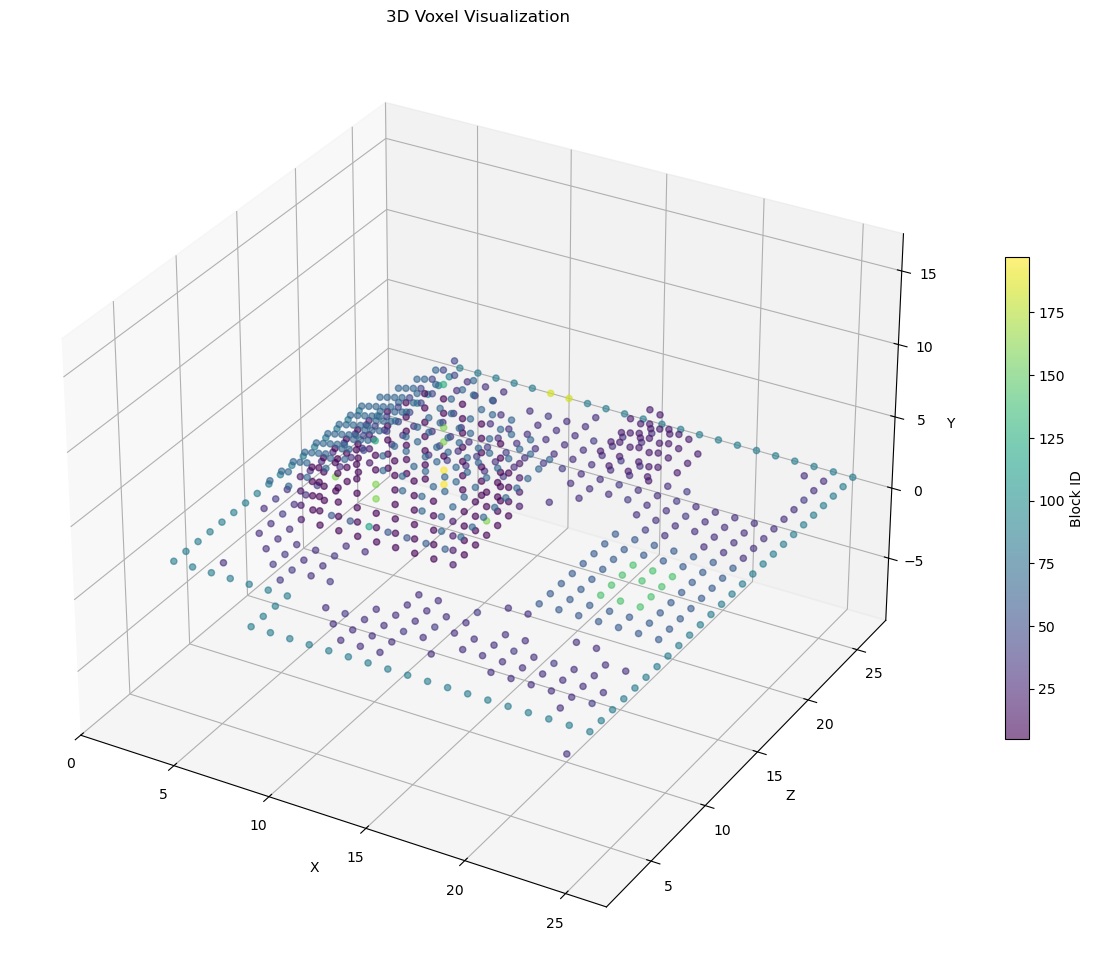

Small Survival House


In [19]:
build = 303
plot_voxel_3d(voxels_np[build])
print(labels_np[build])
